# **EDA Google Play App Store**
**Exploratory Data Analysis**

## About Dataset

>- **`Description`**\
> The Processed DataSet can be downloaded from Kaggle, from the following [link](https://www.kaggle.com/datasets/lava18/google-play-store-apps/)
If you prefer to work with the original DataSet it can also be downloaded from Kaggle, from the following [link](https://www.kaggle.com/datasets/lava18/google-play-store-apps/)

- `Context`
I fixed a lot of problems with the dataset in part 1 of this notebook. Now, you can download the fixed dataset and continue with part 2. Part 1 is done, and you can get the dataset from the link above. I'm sharing part 1 to help you understand what I did with the dataset. If you prefer to work with the original dataset, you can download it along with the processed one.


- `Content`
Each app (row) has values for catergory, rating, size, and more.

- `Acknowledgements`
This data is scraped from the Google Play Store. Without it, we wouldn't have this valuable app information. The data from the Play Store has huge potential to help app businesses succeed. Developers can use it to gain useful insights and conquer the Android market!

# **Part 1**

## 1. Importing Libraries

In [1]:
import pandas as pd  # Data manipulation and analysis library
import numpy as np   # Numerical computing library

# Visualization Libraries
import matplotlib.pyplot as plt  # Data visualization library
import seaborn as sns            # Statistical data visualization library
%matplotlib inline



## 2. Data Loading and exploration and cleaning

 ↪ Load the csv file with the pandas
 
 ↪ creating the dataframe and understanding the data present in the dataset using pandas
 
 ↪ Dealing with the missing data, outliers and the incorrect records

In [2]:
# Load the Dataset
df = pd.read_csv('./Data/Google-Playstore.csv')

- Viewing the first five Rows of the dataset

In [3]:
df.head().T

,0,1,2,3,4
App Name,Gakondo,Ampere Battery Info,Vibook,Smart City Trichy Public Service Vehicles 17UC...,GROW.me
App Id,com.ishakwe.gakondo,com.webserveis.batteryinfo,com.doantiepvien.crm,cst.stJoseph.ug17ucs548,com.horodyski.grower
Category,Adventure,Tools,Productivity,Communication,Tools
Rating,0.0,4.4,0.0,5.0,0.0
Rating Count,0.0,64.0,0.0,5.0,0.0
Installs,10+,"5,000+",50+,10+,100+
Minimum Installs,10.0,5000.0,50.0,10.0,100.0
Maximum Installs,15,7662,58,19,478
Free,True,True,True,True,True
Price,0.0,0.0,0.0,0.0,0.0


- Let's see the exact column names

In [4]:
# Display the column names
df.columns

Index(['App Name', 'App Id', 'Category', 'Rating', 'Rating Count', 'Installs',
       'Minimum Installs', 'Maximum Installs', 'Free', 'Price', 'Currency',
       'Size', 'Minimum Android', 'Developer Id', 'Developer Website',
       'Developer Email', 'Released', 'Last Updated', 'Content Rating',
       'Privacy Policy', 'Ad Supported', 'In App Purchases', 'Editors Choice',
       'Scraped Time'],
      dtype='object')

- Let's have a look on the shape of the dataset

In [5]:
print(f"The dataframe has {df.shape[0]} rows and {df.shape[1]} columns")

The dataframe has 2312944 rows and 24 columns


- Let's have a look on the columns and their data types using detailed info function

In [6]:
# Display detailed information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312944 entries, 0 to 2312943
Data columns (total 24 columns):
 #   Column             Dtype  
---  ------             -----  
 0   App Name           object 
 1   App Id             object 
 2   Category           object 
 3   Rating             float64
 4   Rating Count       float64
 5   Installs           object 
 6   Minimum Installs   float64
 7   Maximum Installs   int64  
 8   Free               bool   
 9   Price              float64
 10  Currency           object 
 11  Size               object 
 12  Minimum Android    object 
 13  Developer Id       object 
 14  Developer Website  object 
 15  Developer Email    object 
 16  Released           object 
 17  Last Updated       object 
 18  Content Rating     object 
 19  Privacy Policy     object 
 20  Ad Supported       bool   
 21  In App Purchases   bool   
 22  Editors Choice     bool   
 23  Scraped Time       object 
dtypes: bool(4), float64(4), int64(1), object(15)
memor

# **Observations**
---
1. There are 2312944 rows and 24 columns in the dataset
2. The columns are of different data types
3. The columns in the datasets are:
   - `'App Name', 'App Id', 'Category', 'Rating', 'Rating Count', 'Installs', 'Minimum Installs',
       'Maximum Installs', 'Free', 'Price', 'Currency', 'Size', 'Minimum Android'  'Developer Id', 'Developer Website', 'Developer Email', 'Released', 'Last Updated', 'Content Rating', 'Privacy Policy', 'Ad Supported', 'In App Purchases', 'Editors Choice', 'Scraped Time', `
4. There are some missing values in the dataset which we will read in details and deal later on in the notebook.
5. Some columns are currently stored as object data type, but they should be numeric. We'll convert them later in the notebook once we decide which columns to keep and which to drop.
   - i.e `'Size',   

- Let's Display descriptive statistics for numerical columns

In [9]:
# Display descriptive statistics for numerical columns
df.describe()

,Rating,Rating Count,Minimum Installs,Maximum Installs,Price
count,2290061.000,2290061.000,2312837.000,2312944.000,2312944.000
mean,2.203,2864.839,183445.214,320201.713,0.103
std,2.106,212162.571,15131439.060,23554954.887,2.633
min,0.000,0.000,0.000,0.000,0.000
25%,0.000,0.000,50.000,84.000,0.000
50%,2.900,6.000,500.000,695.000,0.000
75%,4.300,42.000,5000.000,7354.000,0.000
max,5.000,138557570.000,10000000000.000,12057627016.000,400.000


- If numeric values appear in scientific notation—a method to simplify the presentation of very large or very small numbers—you have the option to adjust settings to show these numbers in full. I favor viewing numbers in their entirety, without scientific notation. Additionally, a reset option is provided, allowing you to comment it out if you wish to return the display settings to their original state.


In [8]:
# Set pandas display options
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# Reset pandas display options
# pd.reset_option('display.float_format')



Statistics Observations

    Rating Diversity:
        Ratings vary from 0 to 5, showcasing diverse user opinions on app quality.

    User Engagement Range:
        'Rating Count' spans from 0 to 138,557,600, indicating varying app popularity.

    Installation Metrics Spectrum:
        'Minimum' and 'Maximum Installs' reflect a wide range, from 0 to 5 billion, highlighting diverse app popularity.

    Pricing Landscape:
        Most apps are free (75% with a price of 0), but premium-priced apps exist, reaching a max of 399.99.

Numeric Considerations

    'Size' and 'Installs' columns may contain non-numeric characters ('M', 'K', 'Varies with device', '+'). Transforming them into numeric formats is crucial for accurate numerical operations.



- Let's clean the `Size` column first

    in Statistics Observations we observed that 'Size' ' columns contain non-numeric characters ('M','K', 'Varies with device', ).So lets check size columns.

In [10]:
# Check values in 'Size' Column 
df['Size'].value_counts()

Varies with device    74777
11M                   62157
12M                   56080
13M                   48034
14M                   45211
                      ...  
8.7k                      1
784M                      1
385M                      1
7.6k                      1
512M                      1
Name: Size, Length: 1657, dtype: int64

 - You can expand the viewing limit for columns and rows by utilizing the following optional commands.

In [11]:
pd.set_option('display.max_columns', None) # this is to display all the columns in the dataframe
pd.set_option('display.max_rows', None) # this is to display all the rows in the dataframe

 - Re-check value count in 'Size' Column 

In [12]:
# Check values in 'Size' Column 
df['Size'].value_counts()

Varies with device    74777
11M                   62157
12M                   56080
13M                   48034
14M                   45211
16M                   42474
15M                   41306
17M                   37244
10M                   34114
18M                   31707
19M                   29723
21M                   29023
20M                   28796
22M                   28261
23M                   27337
24M                   25301
25M                   25023
26M                   23897
27M                   21826
28M                   21157
29M                   20050
37M                   18658
30M                   18625
31M                   18150
4.9M                  17967
32M                   17629
4.2M                  17421
3.8M                  17193
3.7M                  16927
38M                   16811
3.4M                  16752
33M                   16681
4.0M                  16481
3.5M                  16379
3.9M                  16288
3.3M                

-  We have a really big list to show, so we need to be careful about how much computer power we use when we show results, because our dataset is pretty big.

-  There are several unique values in the `Size` column, we have to first make the unit into one common unit from M and K to bytes, and then remove the `M` and `K` from the values and convert them into numeric data type.

Let's check how many values are in megabyte 'M' in it

In [13]:
df['Size'].loc[df['Size'].str.contains('M')].value_counts().sum()

ValueError: Cannot mask with non-boolean array containing NA / NaN values

-  We're getting an error because there are some missing values in our data. So, first, we need to fix these missing values before we can work on the 'size' column.

In [14]:
# Code to check and display the count of missing values in each column, sorted in descending order
df.isnull().sum().sort_values(ascending=False)

Developer Website    760835
Privacy Policy       420953
Released              71053
Rating                22883
Rating Count          22883
Minimum Android        6530
Size                    196
Currency                135
Installs                107
Minimum Installs        107
Developer Id             33
Developer Email          31
App Name                  2
App Id                    0
Price                     0
Free                      0
Maximum Installs          0
Last Updated              0
Content Rating            0
Category                  0
Ad Supported              0
In App Purchases          0
Editors Choice            0
Scraped Time              0
dtype: int64

We can visualize missing values through heatmap.

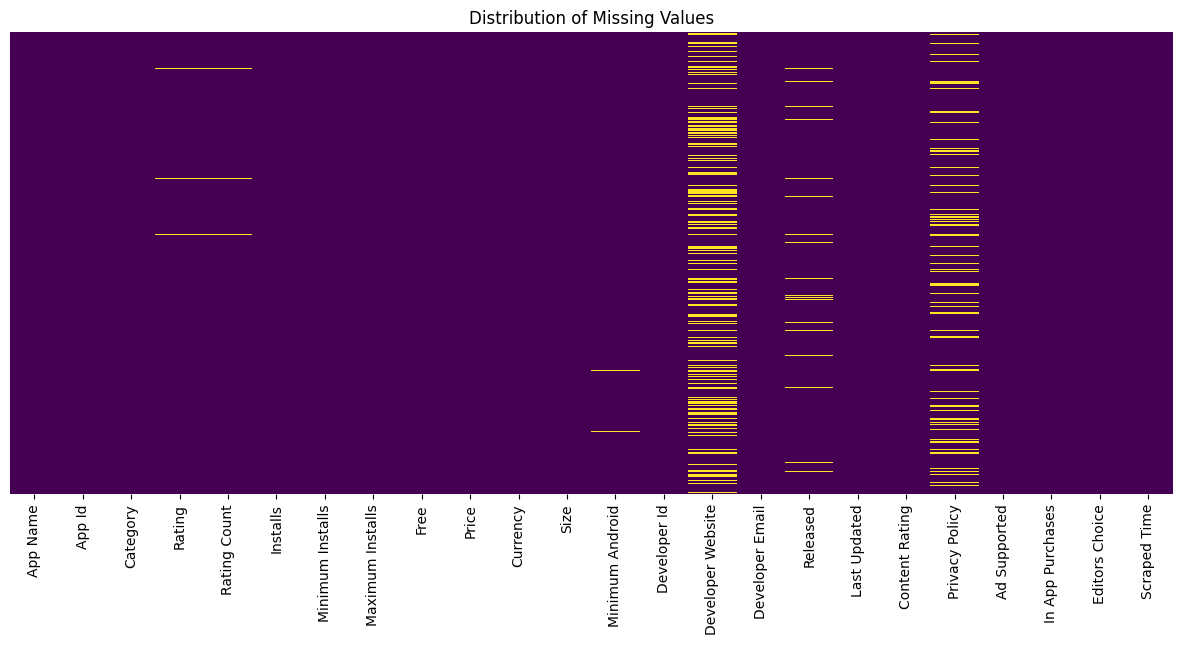

In [15]:
# Create a heatmap to visualize missing values
plt.rcParams['figure.figsize'] = (15,6)
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title("Distribution of Missing Values")
plt.show()

- Let's check what percentage of our data is missing.

In [16]:
#df.isnull().sum()/len(df)*100
missing_percentage = (df.isnull().sum().sort_values(ascending = False)/len(df))*100
missing_percentage

Developer Website   32.895
Privacy Policy      18.200
Released             3.072
Rating               0.989
Rating Count         0.989
Minimum Android      0.282
Size                 0.008
Currency             0.006
Installs             0.005
Minimum Installs     0.005
Developer Id         0.001
Developer Email      0.001
App Name             0.000
App Id               0.000
Price                0.000
Free                 0.000
Maximum Installs     0.000
Last Updated         0.000
Content Rating       0.000
Category             0.000
Ad Supported         0.000
In App Purchases     0.000
Editors Choice       0.000
Scraped Time         0.000
dtype: float64

## Dealing with the null values

- Developer Website has the highest percentage of null values (32.89%).
- Privacy Policy shows significant null values (18.19%).
- Released has approximately 3.07% null values.
- Rating and Rating Count both have 0.98% null values.
- Minimum Android has 0.28% null values.
- Currency have low null values (around 0.005%).
- Installs, Minimum Installs, and Currency have very low null values (around 0.004%).
- Remaining features (Developer Email, Developer Id, Size, App Name) have extremely low null values (less than 0.001%).



- To make things simpler and less sentimental, I've chosen to delete the following columns: 'Developer Website', 'Privacy Policy', 'Developer Email', 'In App Purchases', 'Editors Choice', 'Ad Supported', and 'Scraped Time'.

In [17]:
# Columns to remove
columns_to_remove = ['Developer Website', 'Privacy Policy', 'Developer Email',
                      'In App Purchases', 'Editors Choice', 'Ad Supported', 'Scraped Time']

# Drop the specified columns in-place
df.drop(columns=columns_to_remove, axis=1, inplace=True)

df.head()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Size,Minimum Android,Developer Id,Released,Last Updated,Content Rating
0,Gakondo,com.ishakwe.gakondo,Adventure,0.000,0.000,10+,10.000,15,True,0.000,USD,10M,7.1 and up,Jean Confident Irénée NIYIZIBYOSE,"Feb 26, 2020","Feb 26, 2020",Everyone
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.400,64.000,"5,000+",5000.000,7662,True,0.000,USD,2.9M,5.0 and up,Webserveis,"May 21, 2020","May 06, 2021",Everyone
2,Vibook,com.doantiepvien.crm,Productivity,0.000,0.000,50+,50.000,58,True,0.000,USD,3.7M,4.0.3 and up,Cabin Crew,"Aug 9, 2019","Aug 19, 2019",Everyone
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.000,5.000,10+,10.000,19,True,0.000,USD,1.8M,4.0.3 and up,Climate Smart Tech2,"Sep 10, 2018","Oct 13, 2018",Everyone
4,GROW.me,com.horodyski.grower,Tools,0.000,0.000,100+,100.000,478,True,0.000,USD,6.2M,4.1 and up,Rafal Milek-Horodyski,"Feb 21, 2020","Nov 12, 2018",Everyone



# Imputation in Released Column
- For the 'Released' column, which is crucial for app release dates, we've decided to fill in any missing values using the mode.
- Using the mode, which is the most common date, is a good option for filling in missing values in categorical date data.
- This ensures that we fill in missing values with the most common release date, helping to keep our data complete.



In [18]:
# Impute missing values in 'Released' column with the mode
released_mode = df['Released'].mode()[0]
df['Released'].fillna(released_mode, inplace=True)


- To handle missing values in 'Rating' and 'Rating Count,' we opt for the median because it accurately reflects the middle value, aligning with the existing data pattern. This approach helps balance out extreme values, ensuring trustworthy outcomes.



In [19]:
# Impute missing values in 'Rating' and 'Rating Count' columns with the median
df['Rating'].fillna(df['Rating'].median(), inplace=True)
df['Rating Count'].fillna(df['Rating Count'].median(), inplace=True)

- Now, let's check for missing values again to make sure we've handled them properly.


In [20]:
df.isnull().sum().sort_values(ascending=False)

Minimum Android     6530
Size                 196
Currency             135
Installs             107
Minimum Installs     107
Developer Id          33
App Name               2
Last Updated           0
Released               0
Free                   0
Price                  0
App Id                 0
Maximum Installs       0
Rating Count           0
Rating                 0
Category               0
Content Rating         0
dtype: int64

- To handle missing values in 'Installs' and 'Minimum Installs' we opt for the median because it accurately reflects the middle value, aligning with the existing data pattern. This approach helps balance out extreme values, ensuring trustworthy outcomes.

In [21]:
# Check the data type of 'Minimum Installs' and convert if needed
if df['Minimum Installs'].dtype == 'object':
    df['Minimum Installs'] = df['Minimum Installs'].str.replace(',', '').str.extract('(\d+)').astype(float)

# Impute missing values with median
df['Minimum Installs'].fillna(df['Minimum Installs'].median(), inplace=True)

In [22]:
# Convert categorical values to numeric for 'Installs' column if it's in object format
if df['Installs'].dtype == 'object':
    df['Installs'] = df['Installs'].str.replace(',', '').str.extract('(\d+)').astype(float)

# Impute missing values with median
df['Installs'].fillna(df['Installs'].median(), inplace=True)    

- Now, let's check for missing values again

In [23]:
df.isnull().sum().sort_values(ascending=False)

Minimum Android     6530
Size                 196
Currency             135
Developer Id          33
App Name               2
Price                  0
Last Updated           0
Released               0
Free                   0
App Id                 0
Maximum Installs       0
Minimum Installs       0
Installs               0
Rating Count           0
Rating                 0
Category               0
Content Rating         0
dtype: int64

# Drop Missing Values in Remaining Columns

- Removing missing values guarantees that our data is complete, reliable, and accurate for analysis. This process ensures that important columns have all the necessary information, reduces the chance of biased results, and provides dependable data for making informed decisions.

In [24]:
# Drop all missing values in specific columns
# df.dropna(subset=['Minimum Android', 'Size', 'Currency', 'App Name','Developer Id'], inplace=True)
df.dropna(subset=['Minimum Android', 'Size', 'Currency', 'Developer Id', 'App Name'], inplace=True)

- Let's check if we have any missing values remaining

In [25]:
df.isnull().sum().sort_values(ascending=False)

App Name            0
Price               0
Last Updated        0
Released            0
Developer Id        0
Minimum Android     0
Size                0
Currency            0
Free                0
App Id              0
Maximum Installs    0
Minimum Installs    0
Installs            0
Rating Count        0
Rating              0
Category            0
Content Rating      0
dtype: int64

- Because we successfully imputed all missing values so now we once again go to 'size' column and check how many values are in megabyte 'M' in it

In [26]:
# find the values in size column which has 'M' in it
df['Size'].loc[df['Size'].str.contains('M')].value_counts().sum()

2195318

In [27]:
# find the values in size column which has 'k' in it
df['Size'].loc[df['Size'].str.contains('k')].value_counts().sum()

36130

In [28]:
# find the values in size column which has 'Varies with device' in it
df['Size'].loc[df['Size'].str.contains('Varies with device')].value_counts().sum()

74588

In [29]:
# find the values in size column which has 'Varies with device' in it
df['Size'].loc[df['Size'].str.contains('G')].value_counts().sum()

13

- We have `2195318` values in `M` units
- We have `36130` values in `k` units
- We have `74588` value in `Varies with device` 
- We have `13` values in `G` units

> Let's convert the 'G', `M` and `k` units into bytes and then remove the 'G', `M` and `k` from the values and convert them into numeric data type.

In [31]:
# convert the size column to numeric by multiplying the values with 1024 if it has 'k' in it and 1024*1024 if it has 'M' in it
# this function will convert the size column to numeric
def convert_size(size):
    # add function details here
    '''
    This function will convert the size column to numeric by multiplying the values with 1024 if it has 'k' in it and 1024*1024 if it has 'M' in it
    '''
    
    if isinstance(size, str):
        # Remove commas from the string
        size = size.replace(',', '')
        if 'k' in size:
            return float(size.replace('k', '')) * 1024
        elif 'M' in size:
            return float(size.replace('M', '')) * 1024 * 1024
        elif 'G' in size:
            return float(size.replace('G', '')) * 1024 * 1024 * 1024
        elif 'Varies with device' in size:
            return np.nan
    return size

df['Size'] = df['Size'].apply(convert_size)

In [32]:
# rename the column name 'Size' to 'Size_in_bytes'
df.rename(columns={'Size': 'Size_in_bytes'}, inplace=True)

- Let's replace the missing values of 'Varies with device' with 0.

In [33]:
df['Size_in_bytes'].fillna(0, inplace=True)

- Let's display current info of Data Frame

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2306049 entries, 0 to 2312943
Data columns (total 17 columns):
 #   Column            Dtype  
---  ------            -----  
 0   App Name          object 
 1   App Id            object 
 2   Category          object 
 3   Rating            float64
 4   Rating Count      float64
 5   Installs          float64
 6   Minimum Installs  float64
 7   Maximum Installs  int64  
 8   Free              bool   
 9   Price             float64
 10  Currency          object 
 11  Size_in_bytes     float64
 12  Minimum Android   object 
 13  Developer Id      object 
 14  Released          object 
 15  Last Updated      object 
 16  Content Rating    object 
dtypes: bool(1), float64(6), int64(1), object(9)
memory usage: 301.3+ MB


- Let's make a new column called 'Size in Mb' which will have the size in MB

In [35]:
# making a new column called 'Size in Mb' which will have the size in MB
df['Size_in_Mb'] = df['Size_in_bytes'].apply(lambda x: x/(1024*1024))

In [36]:
df.head()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Size_in_bytes,Minimum Android,Developer Id,Released,Last Updated,Content Rating,Size_in_Mb
0,Gakondo,com.ishakwe.gakondo,Adventure,0.000,0.000,10.000,10.000,15,True,0.000,USD,10485760.000,7.1 and up,Jean Confident Irénée NIYIZIBYOSE,"Feb 26, 2020","Feb 26, 2020",Everyone,10.000
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.400,64.000,5000.000,5000.000,7662,True,0.000,USD,3040870.400,5.0 and up,Webserveis,"May 21, 2020","May 06, 2021",Everyone,2.900
2,Vibook,com.doantiepvien.crm,Productivity,0.000,0.000,50.000,50.000,58,True,0.000,USD,3879731.200,4.0.3 and up,Cabin Crew,"Aug 9, 2019","Aug 19, 2019",Everyone,3.700
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.000,5.000,10.000,10.000,19,True,0.000,USD,1887436.800,4.0.3 and up,Climate Smart Tech2,"Sep 10, 2018","Oct 13, 2018",Everyone,1.800
4,GROW.me,com.horodyski.grower,Tools,0.000,0.000,100.000,100.000,478,True,0.000,USD,6501171.200,4.1 and up,Rafal Milek-Horodyski,"Feb 21, 2020","Nov 12, 2018",Everyone,6.200


In [37]:
df.columns

Index(['App Name', 'App Id', 'Category', 'Rating', 'Rating Count', 'Installs',
       'Minimum Installs', 'Maximum Installs', 'Free', 'Price', 'Currency',
       'Size_in_bytes', 'Minimum Android', 'Developer Id', 'Released',
       'Last Updated', 'Content Rating', 'Size_in_Mb'],
      dtype='object')

- Now that our processed dataset is free of missing values, you can skip part 1 of this notebook and proceed directly with the cleaned dataset of Google Play Store apps. You can download this dataset from the link.

## Part 2

- Import Libraries

In [1]:
import pandas as pd  # Data manipulation and analysis library
import numpy as np   # Numerical computing library

# Visualization Libraries
import matplotlib.pyplot as plt  # Data visualization library
import seaborn as sns            # Statistical data visualization library
%matplotlib inline


In [2]:
# Load the Dataset
df = pd.read_csv('./Data/google_play_store_cleaned.csv')

# Now, we're ready to explore various questions using the dataset.


- Q1. How many apps in this dataset have duplicate names?

In [3]:
# Find the duplicate in 'App Name' column
duplicate_app_names = df['App Name'].duplicated().sum()

print(f"There are total {duplicate_app_names} apps in dataset with duplicate names")

There are total 134549 apps in dataset with duplicate names


- Q2. Please show number count of App Names

In [4]:
df['App Name'].value_counts().sort_values(ascending=False)

Tic Tac Toe                     382
Calculator                      260
Flashlight                      256
BMI Calculator                  199
Age Calculator                  190
                               ... 
Trident Suvidha-Sales             1
My Office Solution                1
Dominoes BIG                      1
Telesistema                       1
Biliyor Musun - Sonsuz Yarış      1
Name: App Name, Length: 2171500, dtype: int64

- Q3. Please display Apps having name Age Calculator 

In [5]:
df[df['App Name'] == 'Age Calculator']

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Size_in_bytes,Minimum Android,Developer Id,Released,Last Updated,Content Rating,Size_in_Mb
3337,Age Calculator,com.jawad.agecalculator,Tools,4.9,83.0,500.0,500.0,536,True,0.00,USD,5347737.6,4.4 and up,Mobix Tech,"May 12, 2020","Jun 18, 2020",Everyone,5.100000
4630,Age Calculator,com.andywebsoft.agecalculator,Productivity,4.5,53.0,10000.0,10000.0,11228,True,0.00,USD,644096.0,2.3 and up,NSTechFrame,"Jan 2, 2015","Feb 12, 2015",Everyone,0.614258
23583,Age Calculator,com.age46.agecalculator,Tools,4.7,22.0,1000.0,1000.0,1795,True,0.00,USD,3460300.8,2.3.3 and up,PureSoft,"Feb 28, 2015","Mar 06, 2015",Everyone,3.300000
37176,Age Calculator,com.zakasoft.myage,Tools,4.1,9.0,1000.0,1000.0,2311,True,0.00,USD,4718592.0,4.4 and up,Zakaria Bin Abdur Rouf,"Sep 26, 2017","Dec 30, 2020",Everyone,4.500000
40793,Age Calculator,com.codedonor.agecalculator,Personalization,0.0,0.0,1000.0,1000.0,1431,True,0.00,USD,1258291.2,4.0.3 and up,Proud Indian Studio,"Jun 12, 2016","Jun 12, 2016",Everyone,1.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2218411,Age Calculator,com.ab.agecalculator,Tools,0.0,0.0,50.0,50.0,63,True,0.00,USD,2621440.0,5.0 and up,Arjun Bhatt,"Dec 14, 2019","Dec 17, 2019",Everyone,2.500000
2223414,Age Calculator,com.lightofray.agecalculator,Tools,5.0,8.0,100.0,100.0,359,True,0.00,USD,3460300.8,5.0 and up,Light Of Rays,"May 10, 2020","Dec 26, 2020",Everyone,3.300000
2279447,Age Calculator,com.kaushaldalvi.agecalcadfree,Tools,4.4,8.0,100.0,100.0,175,False,0.99,USD,3145728.0,2.3.3 and up,Kaushal Dalvi,"Feb 25, 2011","Feb 11, 2014",Everyone,3.000000
2284793,Age Calculator,com.rudranetra.agecalculator,Tools,0.0,0.0,10.0,10.0,29,True,0.00,USD,4194304.0,5.0 and up,Rudra Netra,"Nov 26, 2020","Dec 01, 2020",Everyone,4.000000


- Q4. How many different app prices are there in this dataset?

In [6]:
diff_app_prices = df['Price'].nunique()

print(f"There are total {diff_app_prices} different prices of apps")

There are total 1061 different prices of apps


- Q5. How many free apps are there in this dataset?

In [7]:
total_free_apps = df['Free'].value_counts()[True]

print(f"There are total {total_free_apps} free apps in this dataset")

There are total 2261395 free apps in this dataset


- Q6. How many paid apps are there in this dataset?

In [8]:
total_paid_apps = df['Free'].value_counts()[False]

print(f"There are total {total_paid_apps} paid apps in this dataset")

There are total 44654 paid apps in this dataset


- Q7. What is the predominant content rating for most apps?

In [9]:
df['Content Rating'].value_counts()

Everyone           2015931
Teen                195942
Mature 17+           60127
Everyone 10+         33761
Unrated                154
Adults only 18+        134
Name: Content Rating, dtype: int64

- Q8. Please show me 10 sample apps data?

In [10]:
df.sample(10)

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Size_in_bytes,Minimum Android,Developer Id,Released,Last Updated,Content Rating,Size_in_Mb
1735032,Radios Mexico,com.redeliteapps.radiosmexico,Music & Audio,0.0,0.0,100.0,100.0,359,True,0.0,USD,26214400.0,4.0.3 and up,Redelite apps,"Oct 14, 2019","Oct 14, 2019",Everyone,25.0
379071,GetRunner Runner - Earn Extra Income Easily,com.getrunner.driver.application,Productivity,4.6,9.0,100.0,100.0,480,True,0.0,USD,12582912.0,5.0 and up,GetMove Sdn. Bhd.,"Jun 17, 2020","Jun 02, 2021",Everyone,12.0
74353,The ResilientMind,com.myoutcomes.resilentmind,Health & Fitness,0.0,0.0,100.0,100.0,110,True,0.0,USD,34603008.0,4.2 and up,MyOutcomes For Mental Well Being Inc.,"Jun 26, 2020","May 26, 2021",Everyone,33.0
708217,Pak Independence Photo Frames,com.happy.independence.day.photo.frames,Photography,4.7,757.0,100000.0,100000.0,466187,True,0.0,USD,11534336.0,4.0.3 and up,finkyfour,"Jul 30, 2016","Feb 20, 2020",Everyone,11.0
1840075,BICC 2020,org.oncologyclub.bicc2020,Events,0.0,0.0,10.0,10.0,10,True,0.0,USD,3670016.0,4.4 and up,Shahadat Rigun,"Feb 14, 2020","Feb 14, 2020",Everyone,3.5
897130,Mitsubishi TV Remote,com.tvremoteapp.mitsubishitvremote,Tools,3.6,65.0,10000.0,10000.0,12914,True,0.0,USD,14680064.0,4.4 and up,Just Remote Control,"Mar 8, 2020","Mar 27, 2021",Everyone,14.0
1943772,The Urban Chic Boutique,com.shoptheurbanchic,Shopping,5.0,9.0,10.0,10.0,30,True,0.0,USD,39845888.0,5.0 and up,Rapid Acceleration Partners,"Apr 11, 2021","Apr 11, 2021",Everyone,38.0
1076004,Lumbung Budaya Jogja,org.btkpdiy.lumbungbudayajogja,Education,4.3,36.0,1000.0,1000.0,1864,True,0.0,USD,8178892.8,4.1 and up,Balai Tekkomdik Dinas Dikpora DIY,"Sep 9, 2015","Sep 10, 2015",Everyone,7.8
290693,German Operation Luttich 1944 (turn-limit),com.cloudworth.falaiseg_free,Strategy,4.1,13.0,1000.0,1000.0,1251,True,0.0,USD,1258291.2,4.1 and up,Joni Nuutinen,"Jul 12, 2019","May 05, 2021",Everyone 10+,1.2
1662068,Hair Style Salon Photo Editor,com.VAD.Hair.Style.Salon.Photo.Editor,Photography,2.7,1101.0,500000.0,500000.0,688789,True,0.0,USD,16777216.0,4.4 and up,Virtual Art Design,"Jul 11, 2016","Apr 24, 2019",Everyone,16.0


- Q9. Does this dataset contain any duplicate rows?

In [11]:
# Find duplicates in the data
dup_rows_in_df = df.duplicated().sum()

print(f"There are total {dup_rows_in_df} duplicate rows in this dataset")

There are total 0 duplicate rows in this dataset


- Q10. Please display the top 20 app categories ranked by their installation counts.?
 


- To address this question, we'll need to take some additional steps:
    - Convert the 'Installs' column into integers.
    - Some apps have a value of -2147483648 in the 'Installs' column, which Google doesn't want to display. We'll need to replace this value with the maximum value.

In [12]:
# Convert 'Installs' column to integer
df['Installs'] = df['Installs'].astype(int)

In [13]:
# Find the maximum value in the 'Installs' column
max_installs = df['Installs'].max()

# Replace '-2147483648' with the maximum value
df['Installs'].replace(-2147483648, max_installs, inplace=True)



In [14]:
top_20_categories_df = df.groupby('Category')['Installs'].nlargest(1)
print(top_20_categories_df)

Category                        
Action                   57901       500000000
Adventure                25699       100000000
Arcade                   785381     1000000000
Art & Design             578576      100000000
Auto & Vehicles          1623195    1000000000
Beauty                   2204384      50000000
Board                    1769868     500000000
Books & Reference        489887     1000000000
Business                 1852547    1000000000
Card                     769499      100000000
Casino                   480340       50000000
Casual                   285457     1000000000
Comics                   1155395      50000000
Communication            352159     1000000000
Dating                   1846598     100000000
Education                121984      100000000
Educational              335841      100000000
Entertainment            36844      1000000000
Events                   395464       10000000
Finance                  266378      100000000
Food & Drink             98

- For easier comprehension, let's plot the top ten categories.

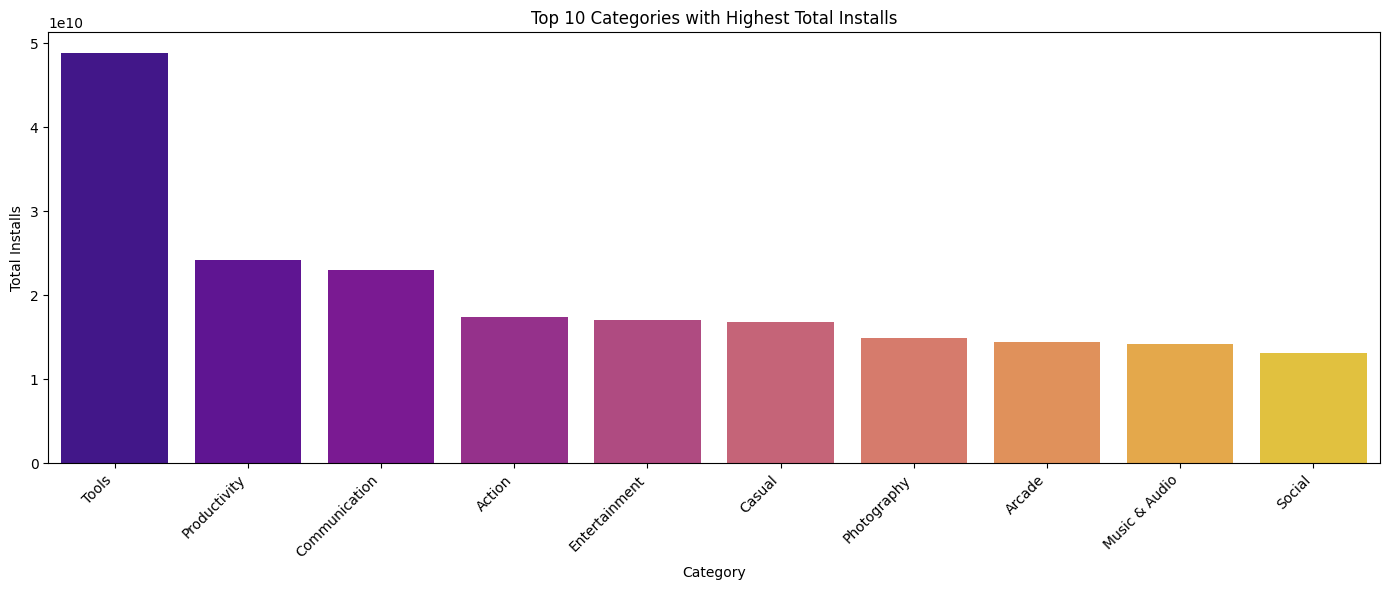

In [15]:
top_10_categories_df = df.groupby('Category')['Installs'].sum().nlargest(10).reset_index()

# Create the bar plot
plt.figure(figsize=(14, 6))
sns.barplot(data=top_10_categories_df, x='Category', y='Installs', palette="plasma")
plt.ylabel('Total Installs')
plt.xlabel('Category')
plt.title('Top 10 Categories with Highest Total Installs')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()


- According to this plot, the Tools category has the highest number of installs.

- Q11. Please present the top 10 app categories with the highest average ratings?

In [16]:
# Category with highest average Rating
top_10_categories_highest_avg_rating = df.groupby('Category')['Rating'].mean().sort_values(ascending=False).head(10)
# Print the result
print(top_10_categories_highest_avg_rating)

Category
Role Playing               3.372444
Casino                     3.279506
Simulation                 3.206113
Weather                    3.121011
Card                       3.087922
Racing                     2.961094
Video Players & Editors    2.904680
Word                       2.902717
Strategy                   2.886392
Comics                     2.869888
Name: Rating, dtype: float64


- Q12. Please display the average price of apps across different categories?

In [17]:
# Group by category and calculate the mean price
average_price_by_category = df.groupby('Category')['Price'].mean().reset_index()

# Print the average price of apps in each category
print(average_price_by_category)

                   Category     Price
0                    Action  0.066630
1                 Adventure  0.180010
2                    Arcade  0.096587
3              Art & Design  0.088625
4           Auto & Vehicles  0.116687
5                    Beauty  0.005154
6                     Board  0.170242
7         Books & Reference  0.193293
8                  Business  0.056066
9                      Card  0.130445
10                   Casino  0.071434
11                   Casual  0.048496
12                   Comics  0.053878
13            Communication  0.042648
14                   Dating  0.084517
15                Education  0.163200
16              Educational  0.171233
17            Entertainment  0.050822
18                   Events  0.003468
19                  Finance  0.052118
20             Food & Drink  0.020124
21         Health & Fitness  0.098702
22             House & Home  0.019028
23         Libraries & Demo  0.041754
24                Lifestyle  0.075994
25        Ma

- To enhance understanding, let's graph the average prices of apps in each category.

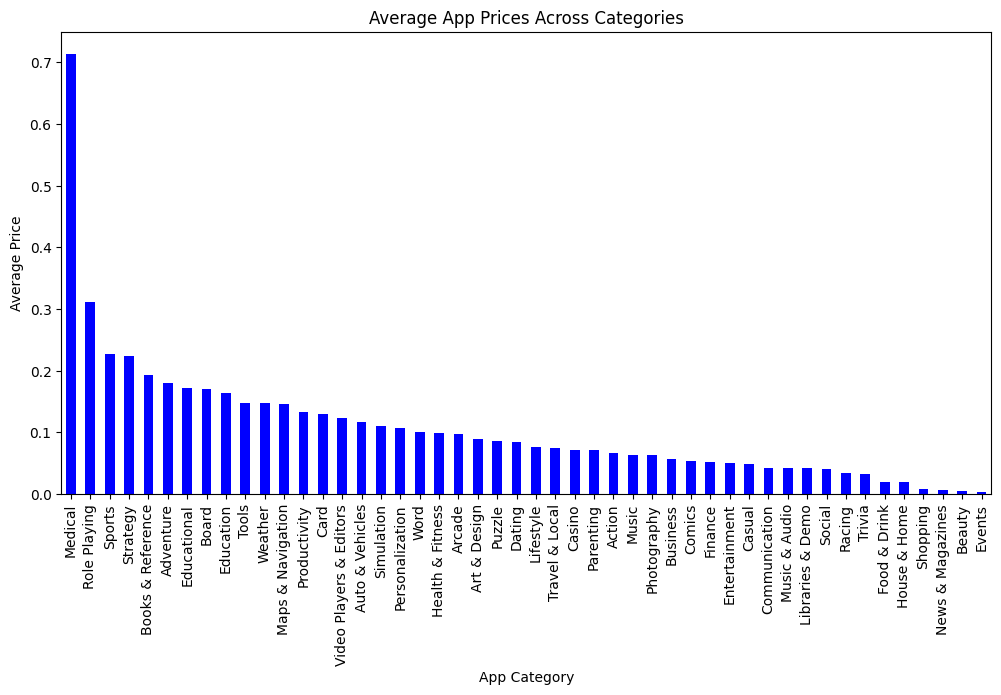

In [18]:
# Calculate the average price of apps in each category using groupby
average_price_by_category = df.groupby('Category')['Price'].mean()

# Plotting the average prices across categories
plt.figure(figsize=(12, 6))
average_price_by_category.sort_values(ascending=False).plot(kind='bar', color='blue')
plt.xlabel('App Category')
plt.ylabel('Average Price')
plt.title('Average App Prices Across Categories')
plt.show()

- According to this plot highest average prices of apps are in Medical category.

- Q13. Please show me the top 10 app developers along with the number of apps they have developed?

In [19]:
# Count the number of apps produced by each developer
top_10_developers = df['Developer Id'].value_counts().head(10)

# Print the result
print("Top 10 app-producing developers:")
print(top_10_developers)

Top 10 app-producing developers:
Subsplash Inc             5422
TRAINERIZE                5153
ChowNow                   4865
OrderYOYO                 2884
Phorest                   2821
BH App Development Ltd    2453
Sharefaith                2077
Flipdish                  1969
J&M Studio                1942
CyJ Studio                1741
Name: Developer Id, dtype: int64


- Q14. Which Android version is most prevalent among top-rated apps?

In [20]:
# Most common Android version among top-rated apps
top_rated_apps = df[df['Rating'] >= 4.5]
most_common_android_version = top_rated_apps.groupby('Minimum Android')['App Name'].count().idxmax()
print(f"The most common Android version among top-rated apps is: {most_common_android_version}")

The most common Android version among top-rated apps is: 4.1 and up


- Q15. Please display the top 10 most common Android versions among top-rated apps?

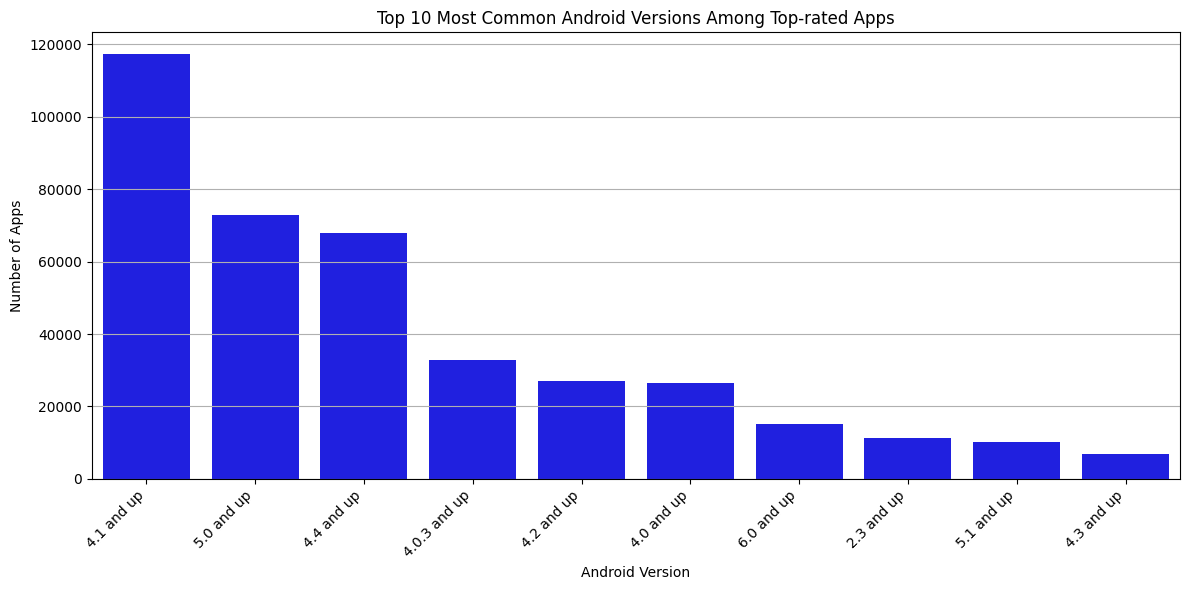

In [21]:
# Get the top 10 most common Android versions among top-rated apps
top_10_android_versions = top_rated_apps['Minimum Android'].value_counts().head(10)

# Plotting with seaborn
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
sns.barplot(x=top_10_android_versions.index, y=top_10_android_versions.values, color='blue')
plt.title('Top 10 Most Common Android Versions Among Top-rated Apps')
plt.xlabel('Android Version')
plt.ylabel('Number of Apps')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(axis='y')  # Add gridlines only along the y-axis
plt.tight_layout()
plt.show()

- Q16. Please show me the top 10 most installed apps across all categories?

In [22]:
top_10_installed_apps = df.sort_values(by='Installs', ascending=False).head(10)[['App Name', 'Category']]
print(top_10_installed_apps)

                                      App Name          Category
605097                                Messages     Communication
1623195                           Android Auto   Auto & Vehicles
64838                                   TikTok            Social
785381                          Subway Surfers            Arcade
1425404                 Android System WebView             Tools
1870890                          YouTube Music     Music & Audio
2049898  Google Duo - High Quality Video Calls     Communication
752600             Google Play Services for AR             Tools
2148656                   Google Play services             Tools
187863                          Samsung Health  Health & Fitness


- Q17. Please show me the top 5 highest-rated paid apps along with their ratings and prices?

In [23]:
# Assuming df is your DataFrame containing the Google Play Store data
top_5_paid_apps = df[df['Price'] > 0].nlargest(5, 'Rating')[['App Name', 'Rating', 'Price']]

print("Top 5 Paid Apps with Highest Ratings:")
print(top_5_paid_apps)

Top 5 Paid Apps with Highest Ratings:
                           App Name  Rating  Price
7718               Iqbaliyat (Urdu)     5.0   0.99
10933          Neo Widgets for KWGT     5.0   1.49
15074  Forest Kitten Live Wallpaper     5.0   1.99
15540                           DES     5.0   5.49
24379              Приемка квартиры     5.0   2.49


- Q18. Please show me the top 5 highest-rated free apps along with their ratings?

In [24]:
# Assuming df is your DataFrame containing the Google Play Store data
top_5_free_apps = df[df['Price'] == 0].nlargest(5, 'Rating')[['App Name', 'Rating']]

print("Top 5 Free Apps with Highest Ratings:")
print(top_5_free_apps)

Top 5 Free Apps with Highest Ratings:
                                             App Name  Rating
3   Smart City Trichy Public Service Vehicles 17UC...     5.0
17                            All in one shopping app     5.0
42                           Niagara Falls Wallpapers     5.0
43                                    Extrude Balance     5.0
72                               Triple Point Academy     5.0


- Q19. Please provide the count of apps in each category

In [26]:
df.groupby('Category').size().sort_values(ascending= False)

Category
Education                  240530
Music & Audio              154689
Tools                      143363
Business                   143227
Entertainment              137966
Lifestyle                  118145
Books & Reference          116581
Personalization             88981
Health & Fitness            83240
Productivity                79287
Shopping                    75132
Food & Drink                73766
Travel & Local              67106
Finance                     65211
Arcade                      53514
Puzzle                      50972
Casual                      50596
Communication               47979
Sports                      47334
Social                      44635
News & Magazines            42707
Photography                 35499
Medical                     31911
Action                      27403
Maps & Navigation           26640
Simulation                  23198
Adventure                   23116
Educational                 21205
Art & Design                18465
Auto 

- Q20. Determine the category with the highest prices among paid apps.

In [28]:
# Filter for paid apps
paid_apps_df = df[df['Free'] == False]

# Group by category and calculate the average price for each category
average_prices = paid_apps_df.groupby('Category')['Price'].mean()

# Identify the category with the highest average price
most_expensive_category = average_prices.idxmax()
max_average_price = average_prices.max()

# Print the result
print(f"The most expensive category among paid apps is '{most_expensive_category}' with an average price of ${max_average_price:.2f}")

The most expensive category among paid apps is 'Dating' with an average price of $23.86


- Q21. Please display the highest-priced apps within each category.

In [29]:
top_priced_apps = df.loc[df.groupby('Category')['Price'].idxmax()]
top_priced_apps[['Category', 'App Name', 'Price']].sort_values(by='Price', ascending=False)

,Category,App Name,Price
542844,Productivity,MESH Connect,400.00
1534601,Lifestyle,Why Not,399.99
919230,Entertainment,Luxsure,399.99
642302,Arcade,Challenge Impossible Ball for you,399.99
20069,Tools,TEST EGY,399.99
1276472,Social,RichWall,399.99
826958,Shopping,Premium Luxury Watches - Luxury Watches Brands,399.99
1395677,Board,Most expensive word game,399.99
650380,Books & Reference,secret of life,399.99
267948,Business,Taxes,399.99


- Q22. Please show me the top 10 rated apps in this dataset with the maximum number of user ratings.


In [30]:

top_rated_apps = df.sort_values(by='Rating Count', ascending=False).head(10)[['App Name', 'Rating Count', 'Category']]

print("Top 10 Rated Apps:")
top_rated_apps

Top 10 Rated Apps:


,App Name,Rating Count,Category
384293,WhatsApp Messenger,138557570.0,Communication
303875,Instagram,120206190.0,Social
2216065,Facebook,117850066.0,Social
878819,YouTube,112440547.0,Video Players & Editors
243569,Garena Free Fire - Rampage,89177097.0,Action
2089577,Messenger – Text and Video Chat for Free,78563229.0,Communication
422719,Clash of Clans,56025424.0,Strategy
57901,PUBG MOBILE - Traverse,37479011.0,Action
64838,TikTok,36446381.0,Social
1825521,Google Photos,35369236.0,Photography


- Q23. Let's find out the number of users for each rating to understand how many apps received ratings

In [31]:
rating_counts = df['Rating'].value_counts().reset_index()
rating_counts


,index,Rating
0,0.0,1055706
1,5.0,99863
2,4.2,87820
3,4.4,86151
4,4.3,83130
5,4.6,78177
6,4.5,76632
7,4.1,69583
8,4.0,67219
9,4.7,62127


- Q24. Please display the year-on-year comparison of apps per content rating?

In [32]:
# Assuming df is your DataFrame containing the Google Play Store data

# Extracting the year from the 'Last Updated' column
df['Year'] = pd.to_datetime(df['Last Updated']).dt.year

# Grouping the data by content rating and year, and counting the number of apps in each group
apps_per_content_rating_year = df.groupby(['Content Rating', 'Year']).size().unstack(fill_value=0)

# Displaying the result
print("Year-on-Year Comparison of Apps per Content Rating:")
print(apps_per_content_rating_year)

Year-on-Year Comparison of Apps per Content Rating:
Year             2009  2010  2011  2012  2013   2014   2015   2016    2017  \
Content Rating                                                               
Adults only 18+     0     0     0     0     0      1      2      3       8   
Everyone           13   215   854  2238  6616  15799  35231  60510  122987   
Everyone 10+        0     2     9    23   114    319    675   1117    2101   
Mature 17+          0     0    15    19    59    160    406    930    1794   
Teen                0     4    19    45   200    614   1944   3742    7958   
Unrated             0     1     1     2    19     59     40      5      13   

Year               2018    2019    2020    2021  
Content Rating                                   
Adults only 18+       5      21      41      53  
Everyone         199650  378002  626442  567374  
Everyone 10+       2676    6457   10001   10267  
Mature 17+         4788   10353   19993   21610  
Teen              15387

- Q25. Please show me Top 10 Years with the Highest Number of App Releases.

In [33]:
# Assuming you have a DataFrame named df with the 'Released' column containing the release dates of the apps

# Convert 'Released' column to datetime format
df['Released'] = pd.to_datetime(df['Released'])

# Extract the release year and create a new column 'Year_Release'
df['Year_Release'] = df['Released'].dt.strftime('%Y')

# Group by 'Year_Release' and count the number of apps released in each year
cnt_year_app_Release = df.groupby('Year_Release').size().reset_index(name='Count')

# Sort the result by count in descending order and display the top 10 years
top_10_years = cnt_year_app_Release.head(20).sort_values(by='Count', ascending=False)

print(top_10_years)

   Year_Release   Count
10         2020  612959
9          2019  479031
8          2018  334028
7          2017  259377
11         2021  179794
6          2016  166811
5          2015  115287
4          2014   71718
3          2013   42405
2          2012   25665
1          2011   14342
0          2010    4632


- We can create a bar plot illustrating the Top 10 Years with the Highest Number of App Releases.


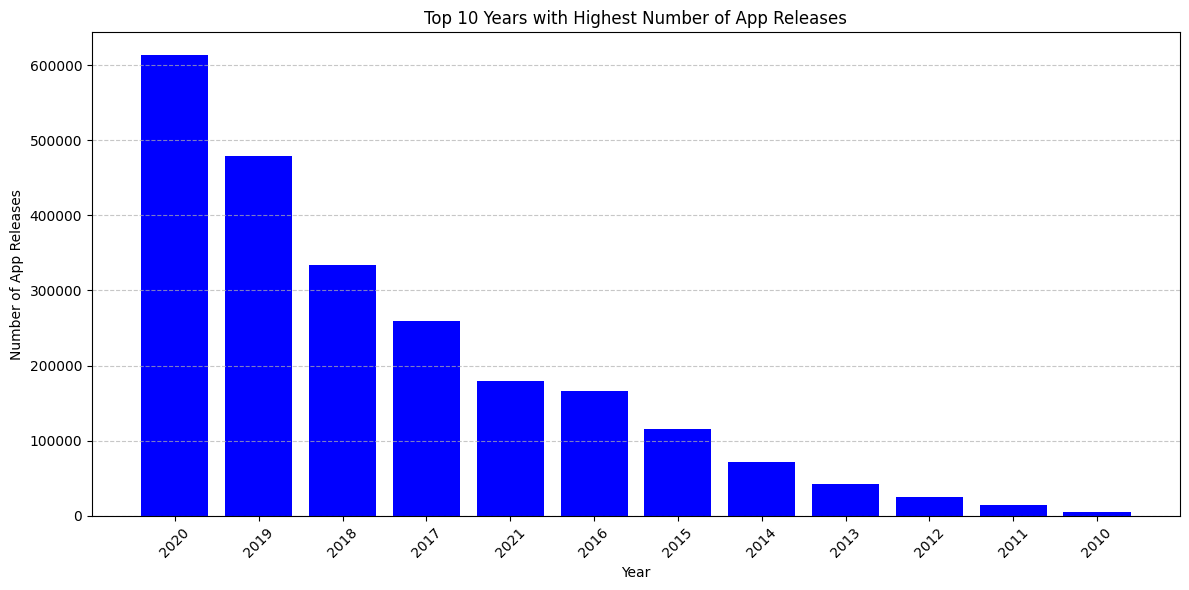

In [34]:
plt.figure(figsize=(12, 6))
plt.bar(top_10_years['Year_Release'], top_10_years['Count'], color='blue')
plt.title('Top 10 Years with Highest Number of App Releases')
plt.xlabel('Year')
plt.ylabel('Number of App Releases')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

- Q26. Please present a scatter plot to illustrate any relationship between user ratings and app prices?


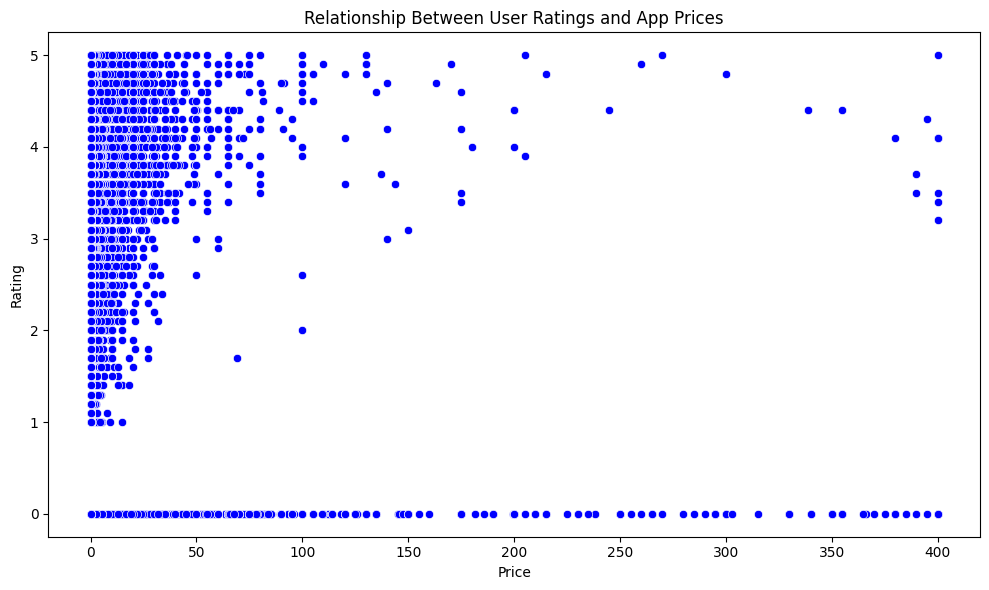

In [35]:
# Plotting the relationship between user ratings and app prices
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Price', y='Rating', color='blue')
plt.xlabel('Price')
plt.ylabel('Rating')
plt.title('Relationship Between User Ratings and App Prices')
plt.grid(False)
plt.tight_layout()
# Save the plot as an image file
plt.savefig('user_ratings_vs_app_prices.png')
plt.show()

- Q27. Please create a scatter plot to visualize if there is any relationship between rating count and app size?

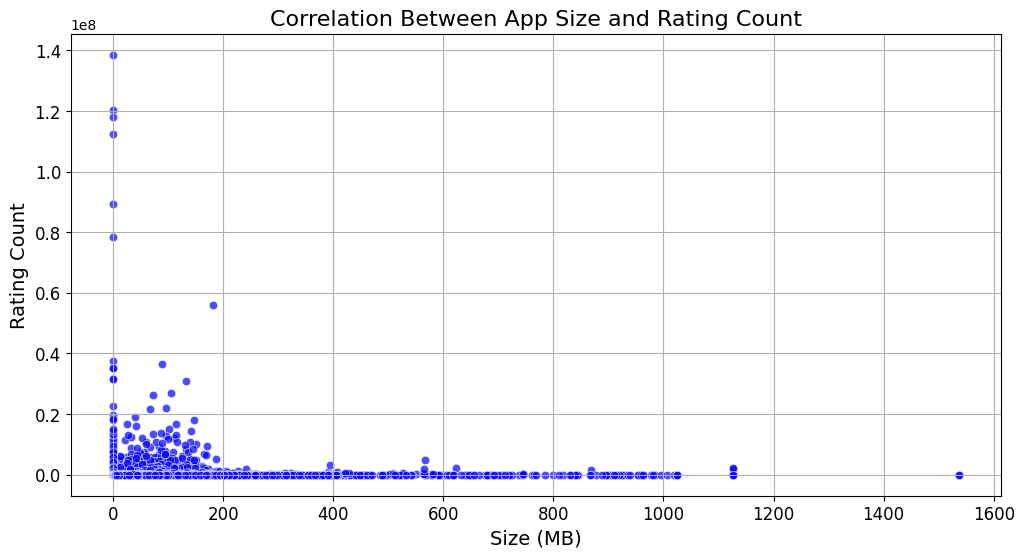

In [37]:
# Plotting the scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Size_in_Mb', y='Rating Count', data=df, alpha=0.7, color='blue')
plt.title('Correlation Between App Size and Rating Count', fontsize=16)
plt.xlabel('Size (MB)', fontsize=14)
plt.ylabel('Rating Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)


# Show the plot
plt.show()

- Q28. Show me top 5 Puzzle apps with highest ratings.

In [40]:
# Assuming df is your DataFrame containing the Google Play Store data
top_5_puzzle_apps = df[df['Category']== 'Puzzle'].nlargest(5, 'Rating')[['App Name', 'Rating']]

print("Top 5 Puzzle Apps with Highest Ratings:")
print(top_5_puzzle_apps)

Top 5 Puzzle Apps with Highest Ratings:
                    App Name  Rating
1027      Coptic Memory Game     5.0
1257  Juegos Turismo Villena     5.0
3385            Mars Bubbles     5.0
4385              Neuu Scsim     5.0
4663          2048 Challenge     5.0


- Q29. Show me top 5 Medical apps with highest ratings.

In [41]:
# Assuming df is your DataFrame containing the Google Play Store data
top_5_medical_apps = df[df['Category']== 'Medical'].nlargest(5, 'Rating')[['App Name', 'Rating']]

print("Top 5 Medical Apps with Highest Ratings:")
print(top_5_medical_apps)

Top 5 Medical Apps with Highest Ratings:
                  App Name  Rating
1263           CALIPER App     5.0
4904                 Argon     5.0
5398        Auxein Medical     5.0
6472  El Menesy Pharmacies     5.0
9030              Ecg.tips     5.0


- Q30. Please generate a bar plot showing the year-on-year breakdown of the top 5 categories based on app prices?

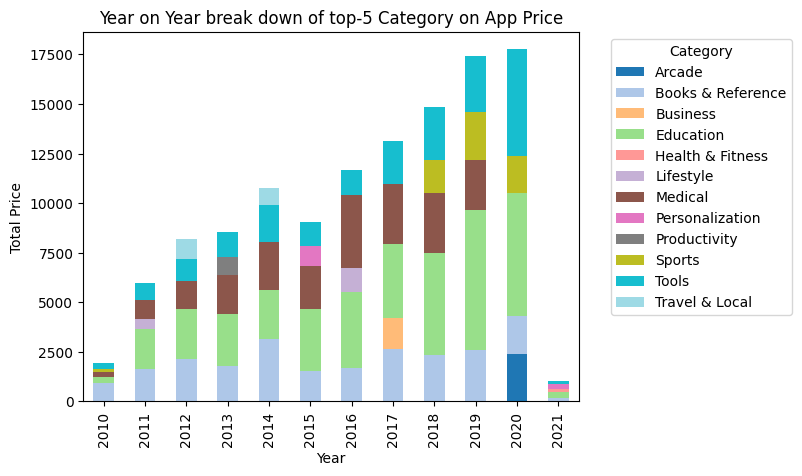

In [42]:
Rev_per_Genre = df.groupby(['Year_Release','Category' ])[['Price']].sum()


top5_genres = (Rev_per_Genre
                       .sort_values(['Year_Release', 'Price'], ascending=[True, False])
                       .groupby('Year_Release')
                       .head(5))

# Define a colormap: To present each category with a different color 
cmap = plt.get_cmap('tab20')


# Group by year and primary genre, and plot a stacked bar chart
top5_genres.groupby(['Year_Release', 'Category'])['Price'].sum().unstack().plot(kind='bar', stacked=True, title= "Year on Year break down of top-5 Category on App Price", cmap=cmap)

# Customize the plot
plt.xlabel('Year')
plt.ylabel('Total Price')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

- While this wasn't a thorough analysis of the Google Play Store, we still gathered a lot of information. The depth of our exploration often depends on why we're doing it in the first place. Our motive guides how deep we dive into the data. If we're researching a particular category of apps, then we can explore more deeply within that specific category.